<p>1. Buscar un conjunto de datos a analizar:</p>
<li>Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.</li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [6]:
df = pd.read_csv("datos/imdb_top_1000.csv")
df.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [7]:
df = df.drop(['Poster_Link'], axis=1)

In [8]:
df.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


<p> 2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:</p>
<li>Esto se hace para que comprendais mejor los datos con los que estais trabajando.</li>
<li>Realizar un EDA sencillo para la variable dependiente y la variable independiente.</li>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.3+ KB


In [10]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


In [13]:
df.describe(include='object').T

,count,unique,top,freq
Series_Title,1000,999,Drishyam,2
Released_Year,1000,100,2014,32
Certificate,899,16,U,234
Runtime,1000,140,100 min,23
Genre,1000,202,Drama,85
Overview,1000,1000,Two imprisoned men bond over a number of years...,1
Director,1000,548,Alfred Hitchcock,14
Star1,1000,660,Tom Hanks,12
Star2,1000,841,Emma Watson,7
Star3,1000,891,Rupert Grint,5


In [15]:
df.shape

(1000, 15)

In [16]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,IMDB_Rating,Meta_score,No_of_Votes
0,9.3,80.0,2343110
1,9.2,100.0,1620367


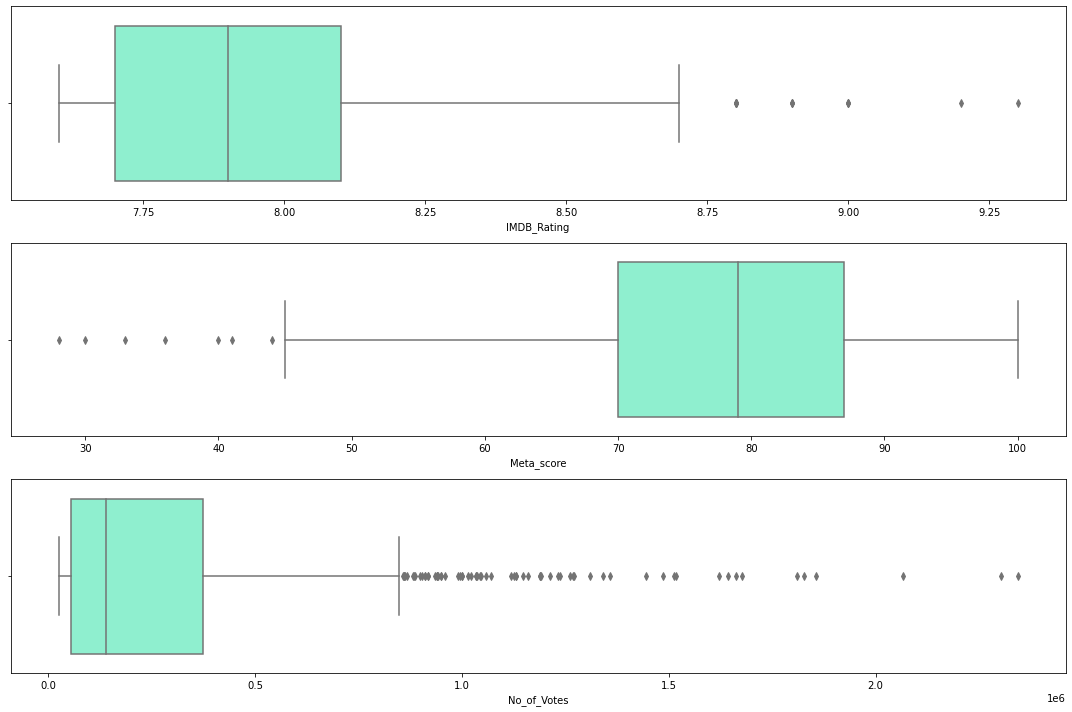

In [24]:
fig,axes = plt.subplots(3,1, figsize = (15,10))
axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine");
    
plt.tight_layout()
plt.show()

<p> No hemos eliminado los outliers porque consideramos que están vinculados a la variable respuesta. </p>

<p> Vamos a elegir IMDB_ratings como nuestra variable respuesta de cara a realizar predicciones ya que pensamos que está vinculada al resto de variables numéricas y categóricas que miden la popularidad de una película. </p>